# sLoreta PWI Gran Average

In [18]:
path = r"C:\Users\felip\OneDrive - Universidad Técnica Federico Santa María\Documentos\UV\EEG_ERP_Analysis"



In [ ]:
import pandas as pd

# Ajusta el separador según corresponda (por ejemplo, '\t' para tabulaciones o ',' para comas)
df = pd.read_csv(f"{path}\Data\PWI_sLoreta_1000_txt\AVE_Baseline Correction_Con_2_Raw Data-sLorRoi.txt", sep="\t")
print(df.head())


In [ ]:
import pandas as pd

# Leer las líneas del archivo
with open(rf"{path}\Data\PWI_sLoreta_1000_txt\AVE_Baseline Correction_Con_2_Raw Data-sLorRoi.txt", "r") as file:
    lines = file.readlines()


# Procesar cada línea, eliminando espacios adicionales y dividiendo por espacios
data = [list(map(float, line.split())) for line in lines if line.strip()]  # Evita líneas vacías

# Convertir a un DataFrame
df = pd.DataFrame(data)

# Mostrar las primeras filas
print(df.head())


In [ ]:
import pandas as pd
import os

# Lista de archivos a procesar
files = [
    "AVE_Baseline Correction_Con_2_Raw Data-sLorRoi.txt",
    "AVE_Baseline Correction_Con_Raw Data-sLorRoi.txt",
    "AVE_Baseline Correction_Rel_2_Raw Data-sLorRoi.txt",
    "AVE_Baseline Correction_Rel_Raw Data-sLorRoi.txt",
    "AVE_Baseline Correction_Unr_2_Raw Data-sLorRoi.txt",
    "AVE_Baseline Correction_Unr_Raw Data-sLorRoi.txt"
]

# Nombres cortos para el diccionario
names = ['con_2', 'con', 'rel_2', 'rel', 'unr_2', 'unr']

# Ruta base
base_path = rf"{path}\Data\PWI_sLoreta_1000_txt"

# Diccionario para almacenar los DataFrames
dataframes = {}

# Procesar cada archivo
for file_name, name in zip(files, names):
    file_path = os.path.join(base_path, file_name)
    with open(file_path, "r") as file:
        lines = file.readlines()
    
    # Procesar las líneas del archivo
    data = [list(map(float, line.split())) for line in lines if line.strip()]  # Evita líneas vacías

    # Crear el DataFrame y almacenarlo en el diccionario
    df = pd.DataFrame(data)
    dataframes[name] = df

    # Mostrar las primeras filas del DataFrame
    print(f"DataFrame para {name}:")
    print(df.head())
    print("\n")


In [ ]:
import pandas as pd

# Ruta del archivo
path = r"C:\Users\felip\OneDrive - Universidad Técnica Federico Santa María\Documentos\UV\EEG_ERP_Analysis"

# Leer el archivo de nombres de regiones
file_path = f"{path}\AAL_eeg-ROInames.txt"
with open(file_path, "r") as file:
    lines = file.readlines()

# Crear un diccionario para mapear números a nombres de regiones
region_mapping = {}
for line in lines:
    if line.strip():  # Evitar líneas vacías
        number, region = line.split("-", 1)
        region_mapping[int(number) - 1] = region.strip()  # Restar 1 para que coincida con los índices de las columnas

# Cambiar los nombres de las columnas en el DataFrame
df.rename(columns=region_mapping, inplace=True)

# Mostrar las primeras filas del DataFrame actualizado
print(df.head())


In [ ]:
import pandas as pd
import os

# Ruta al archivo de nombres de regiones
region_file_path = rf"{path}\AAL_eeg-ROInames.txt"

# Leer el archivo de nombres de regiones
with open(region_file_path, "r") as file:
    lines = file.readlines()

# Crear un diccionario para mapear números a nombres de regiones
region_mapping = {}
for line in lines:
    if line.strip():  # Evitar líneas vacías
        number, region = line.split("-", 1)
        region_mapping[int(number) - 1] = region.strip()  # Restar 1 para que coincida con los índices de las columnas

# Aplicar el mapeo de nombres de regiones a cada DataFrame
for name, df in dataframes.items():
    df.rename(columns=region_mapping, inplace=True)
    print(f"DataFrame actualizado para {name}:")
    print(df.head())
    print("\n")


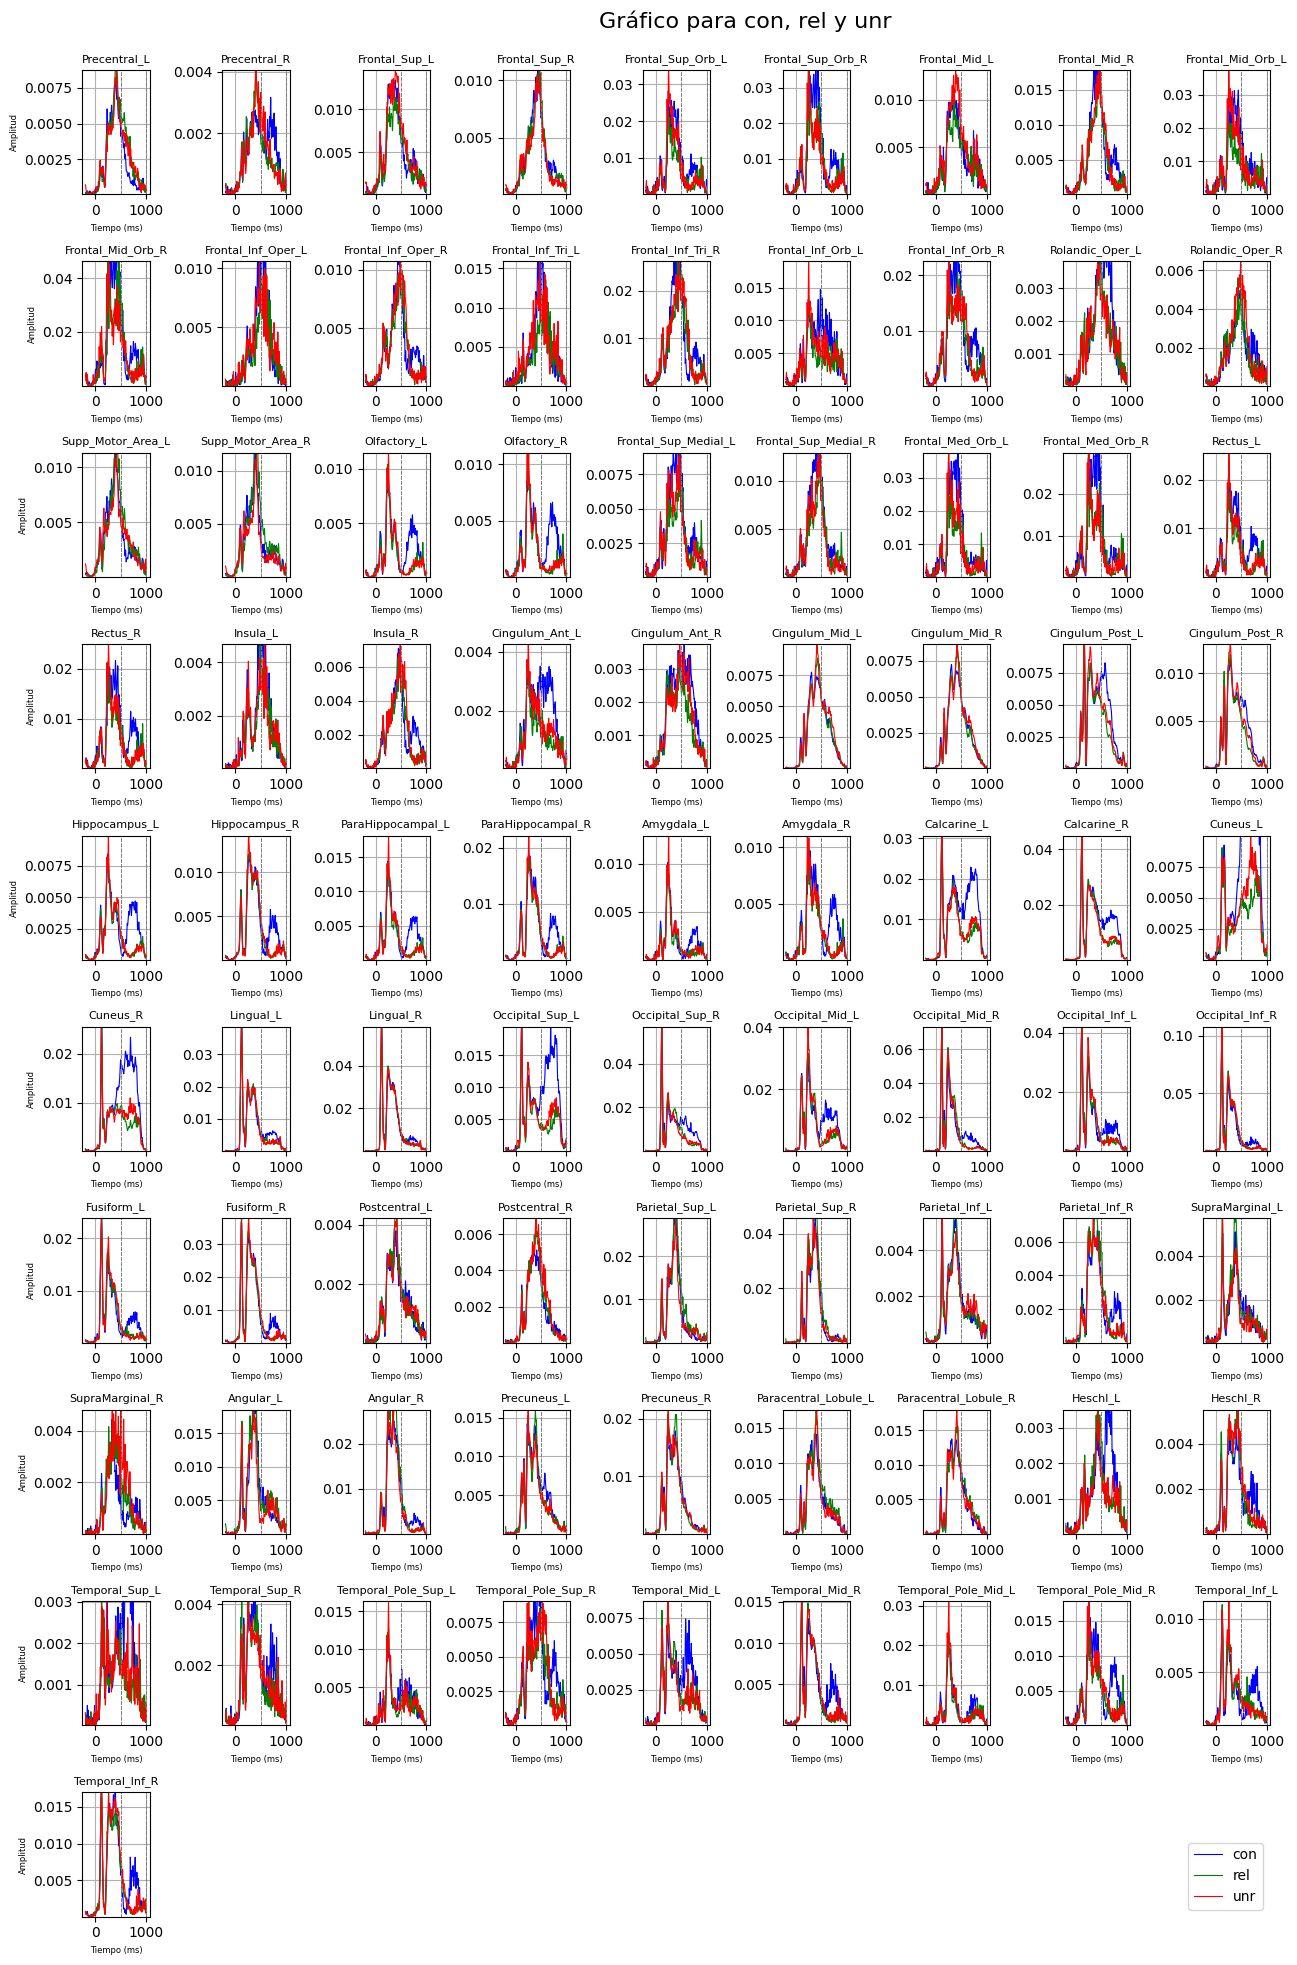

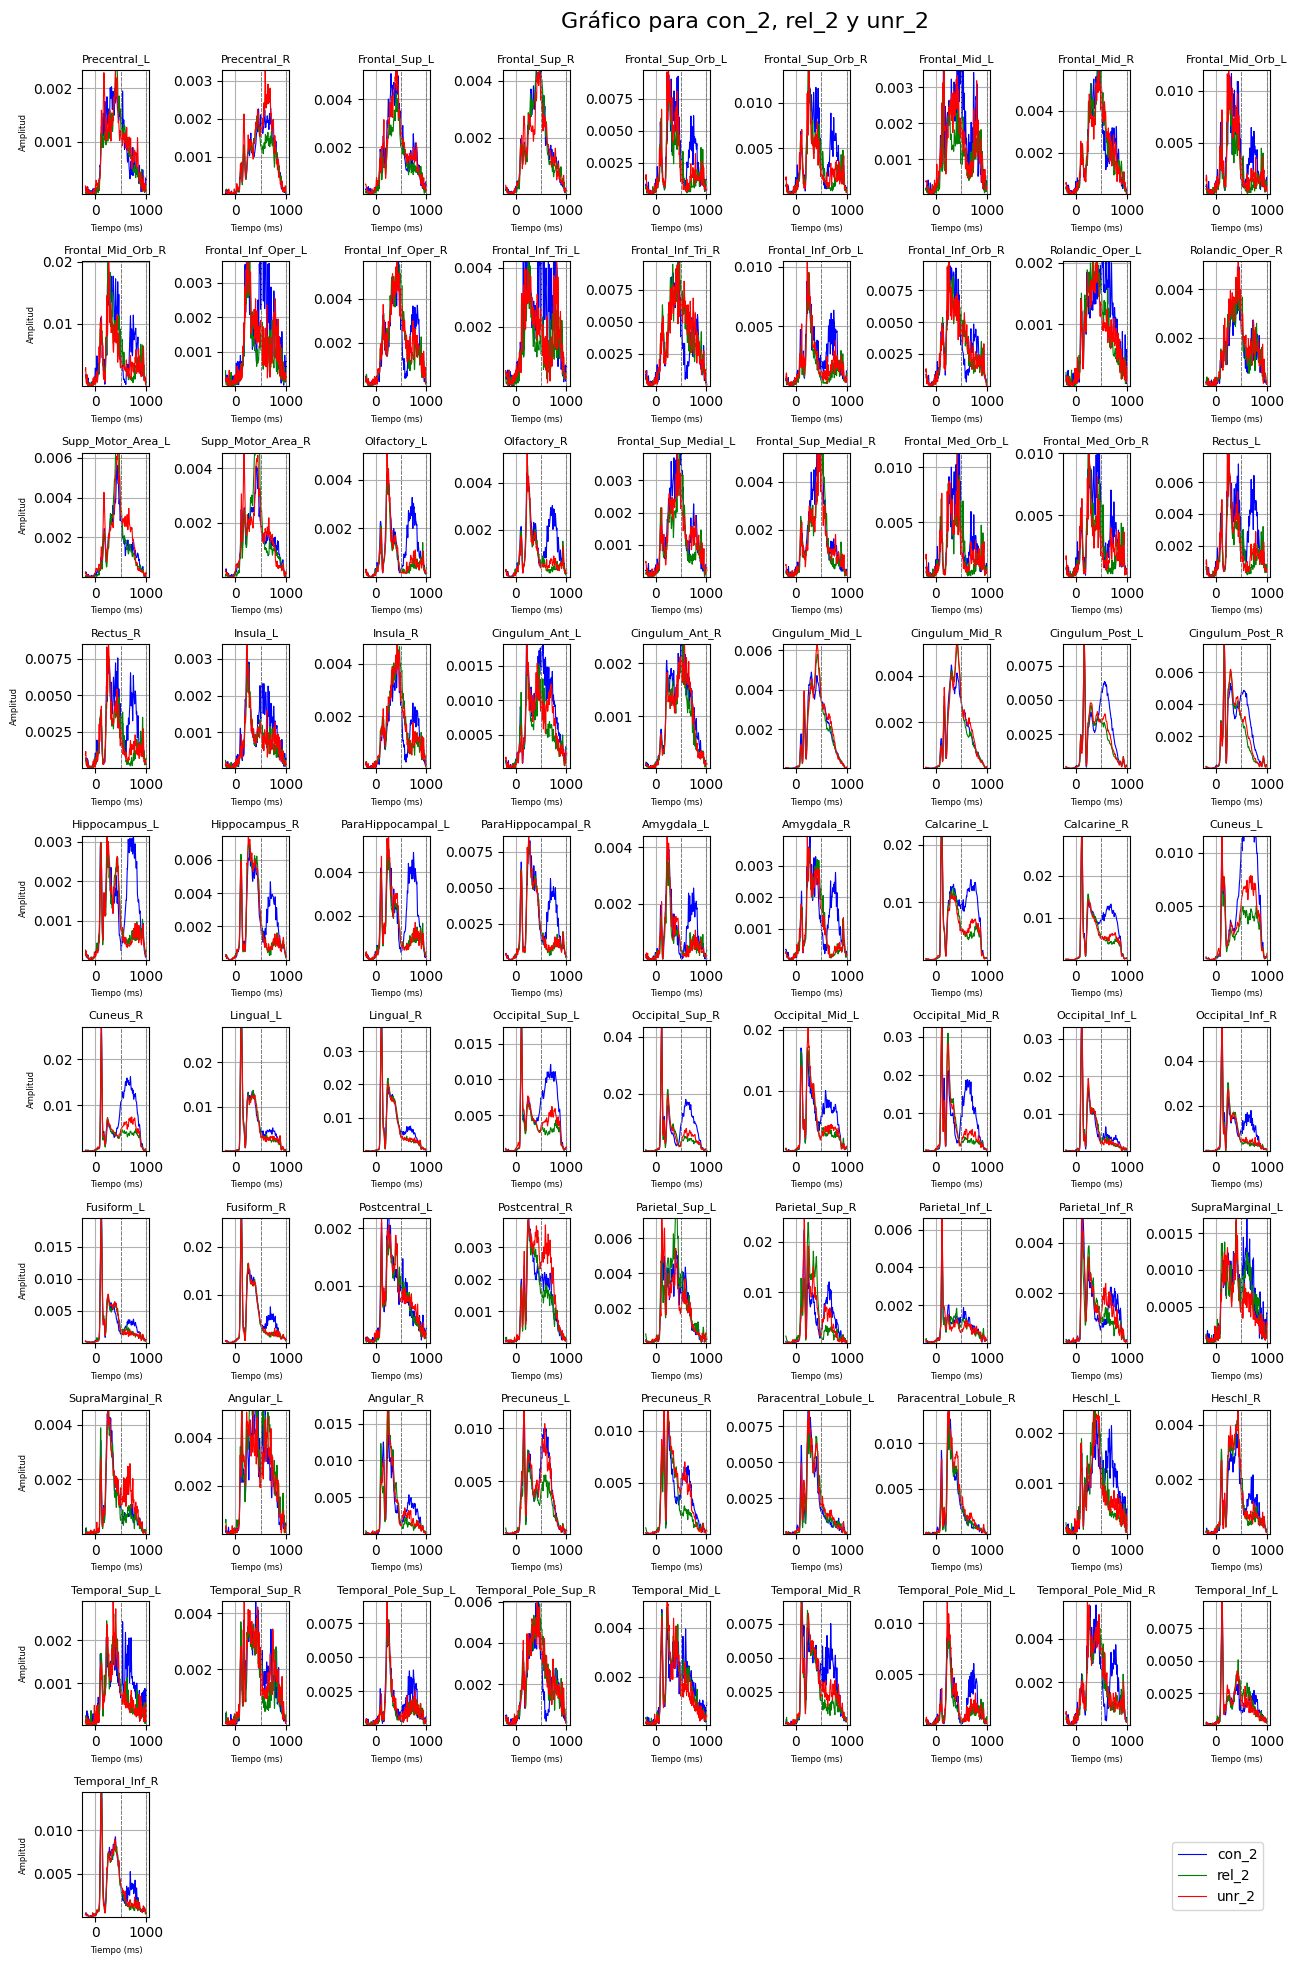

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Definir los colores como un parámetro
colors = {
    'con': 'b',   # Azul
    'rel': 'g',   # Verde
    'unr': 'r',   # Rojo
    'con_2': 'b', # Cian
    'rel_2': 'g', # Magenta
    'unr_2': 'r'  # Amarillo
}

# Función para generar los gráficos
def plot_regions(dataframes, regions, title, colors, sample_rate=1024, pre_stimulus=200, line_width=0.8):
    # Crear la figura
    fig, axes = plt.subplots(nrows=10, ncols=9, figsize=(15, 20))
    axes = axes.flatten()  # Para hacer un array 1D de todos los subgráficos
    
    # Crear un arreglo de tiempo basado en la frecuencia de muestreo
    time = (np.arange(0, dataframes[regions[0]].shape[0]) - pre_stimulus) / sample_rate * 1000  # Tiempo en milisegundos

    # Iterar sobre cada DataFrame
    for idx, (name, df) in enumerate(dataframes.items()):
        if name not in regions:
            continue

        # Solo tomar las primeras 82 columnas (regiones consideradas)
        df_regions = df.iloc[:, :82]

        # Crear los gráficos para cada región
        for i, region in enumerate(df_regions.columns):
            ax = axes[i]
            ax.plot(time, df_regions[region], color=colors[name], label=name, linewidth=line_width)  # Graficar la región con color
            ax.set_title(region, fontsize=8)  # Título con el nombre de la región
            ax.grid(True)  # Activar la grilla
            
            # Mostrar el eje X con los valores de tiempo en milisegundos
            ax.set_xlabel('Tiempo (ms)', fontsize=6)
            
            # Solo mostrar la etiqueta de "Amplitud" en la primera columna (índices 0, 9, 18, ..., 72)
            if i % 9 == 0:
                ax.set_ylabel('Amplitud', fontsize=6)
            else:
                ax.set_ylabel('')  # Eliminar la etiqueta en otras columnas

            # Configurar el eje Y (amplitudes) para que sea visible
            ax.set_ylim(df_regions[region].min(), df_regions[region].max())

            # Añadir una grilla adicional en 500 ms
            ax.axvline(x=500, color='gray', linestyle='--', linewidth=0.7)  # Línea gris en 500 ms
            ax.axvline(x=1000, color='gray', linestyle='--', linewidth=0.7)  # Línea gris en 1000 ms

        # Dejar en blanco las posiciones para las regiones no consideradas (columnas 83 a 90)
        for j in range(82, 90):  # De la columna 83 a la 90, dejar en blanco
            axes[j].axis('off')

    # Ajustar el espacio entre los subgráficos y dejar espacio arriba para el título
    plt.tight_layout()
    plt.subplots_adjust(top=0.95, right=0.85)  # Ajustar el top para dejar espacio para el título y leyenda

    # Mostrar la figura
    plt.suptitle(title, fontsize=16)

    # Leyenda abajo a la derecha
    handles, labels = axes[0].get_legend_handles_labels()  # Obtener los handles de la leyenda
    plt.legend(handles, labels, loc='lower right', fontsize=10, bbox_to_anchor=(1, 0))  # Ajustar la leyenda abajo a la derecha

    plt.show()

# Crear la primera figura para 'con', 'inc', 'rel'
plot_regions(dataframes, ['con', 'rel', 'unr'], 'Gráfico para con, rel y unr', colors)

# Crear la segunda figura para 'con_2', 'rel_2', 'unr_2'
plot_regions(dataframes, ['con_2', 'rel_2', 'unr_2'], 'Gráfico para con_2, rel_2 y unr_2', colors)
